number of object points sublists:  11
number of image points sublists:  11


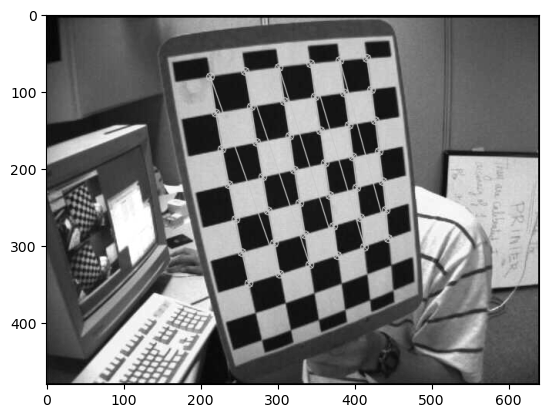

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob

chess_points = np.zeros((6*7,3), np.float32)
chess_points[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('calibration/*.jpg')

for fname in images:
    img = cv.imread(fname, cv.IMREAD_GRAYSCALE)
    ret, corners = cv.findChessboardCorners(img, (7,6), None)

    if ret == True:
        criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners = cv.cornerSubPix(img, corners, (11,11), (-1,-1), criteria)
      
        objpoints.append(chess_points)
        imgpoints.append(corners)

        cv.drawChessboardCorners(img, (7,6), corners, ret)

        #plt.figure()
        plt.imshow(img, cmap='gray')

print('number of object points sublists: ', len(objpoints))
print('number of image points sublists: ', len(imgpoints))

In [2]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, img.shape, None, None)

np.savez('camera.npz', mtx=mtx, dist=dist, rvecs=rvecs, tvecs=tvecs)

print('calibration accuracy: ', ret)
print('camera matrix shape: ', mtx.shape)
print('shape of distortion parameters: ', dist.shape)
print('number of rotation vectors: ', len(rvecs))
print('number of translation vectors: ', len(tvecs))

print('camera matrix: \n', mtx)
print('distortion parameters: \n', dist)

calibration accuracy:  0.15536906910078763
camera matrix shape:  (3, 3)
shape of distortion parameters:  (1, 5)
number of rotation vectors:  11
number of translation vectors:  11
camera matrix: 
 [[534.07088365   0.         341.53407553]
 [  0.         534.11914596 232.94565261]
 [  0.           0.           1.        ]]
distortion parameters: 
 [[-2.92971637e-01  1.07706962e-01  1.31038377e-03 -3.11018781e-05
   4.34798105e-02]]
